In [142]:
%run SAT_help_functions.ipynb

In [307]:
path = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/Ratcliff 1998/jf.dat"
df = pd.read_csv(path, delimiter='\t')

df.columns=["Nothing", "Condition", "Choice", "RT"]
df["RT"] = df["RT"]/1000
df["Choice"] = df["Choice"]-1

df.loc[df["Condition"] <= 33, "SAT"] = "Accuracy"
df.loc[df["Condition"] > 33, "SAT"] = "Speed"

df.loc[df["Condition"] <= 33, "Brightness"] = df["Condition"]
df.loc[df["Condition"] > 33, "Brightness"] = df["Condition"]-33

df.loc[df["Brightness"] <= 17, "Correct"] = df.loc[df["Brightness"] <= 17, "Choice"]==0
df.loc[df["Brightness"] >17, "Correct"] = df.loc[df["Brightness"] >17, "Choice"]==1



# to plot latency function
df.loc[df["Brightness"] < 17, "Difficulty"] = df["Brightness"]
df.loc[df["Brightness"] > 17, "Difficulty"] = 33-df["Brightness"]+1


In [304]:
df

,Nothing,Condition,Choice,RT,SAT,Brightness,Correct,Difficulty
0,1,1,0,0.995,Accuracy,1.0,1,1.0
1,1,1,0,1.265,Accuracy,1.0,1,1.0
2,1,1,0,0.712,Accuracy,1.0,1,1.0
3,1,1,0,0.623,Accuracy,1.0,1,1.0
4,1,1,0,0.456,Accuracy,1.0,1,1.0
...,...,...,...,...,...,...,...,...
7884,1,66,0,0.193,Speed,33.0,0,1.0
7885,1,66,1,0.249,Speed,33.0,1,1.0
7886,1,66,1,0.361,Speed,33.0,1,1.0
7887,1,66,1,0.338,Speed,33.0,1,1.0


In [363]:
data_plot = df.groupby(["SAT", "Difficulty", "Correct"]).agg({"Correct":'count'})

data_plot2 = df.groupby(["SAT", "Difficulty"]).agg({"Correct":'count'})

data_plot3 = df.groupby(["SAT", "Difficulty", "Correct"]).agg({'RT':'mean'})

 
data_plot = pd.concat((data_plot/data_plot2,data_plot3), axis = 1)
data_plot

Correct        RT
SAT      Difficulty Correct                    
Accuracy 1.0        True     1.000000  0.668628
         2.0        True     1.000000  0.628532
         3.0        True     1.000000  0.675952
         4.0        True     1.000000  0.589057
         5.0        False    0.025424  0.414333
                    True     0.974576  0.645287
         6.0        True     1.000000  0.674712
         7.0        True     1.000000  0.660040
         8.0        True     1.000000  0.683502
         9.0        False    0.007547  0.802500
                    True     0.992453  0.692605
         10.0       False    0.018519  1.190800
                    True     0.981481  0.700521
         11.0       False    0.024316  1.146375
                    True     0.975684  0.700246
         12.0       False    0.032164  1.170455
                    True     0.967836  0.791215
         13.0       False    0.075000  1.185778
                    True     0.925000  0.862835
         14.0       False    0.120000  1.419583
                    True     0.880000  0.923764
         15.0       False    0.243373  1.075347
                    True     0.756627  0.891729
         16.0       False    0.380510  1.058116
                    True     0.619490  0.952184
Speed    1.0        False    0.111111  0.245000
                    True     0.888889  0.331325
         2.0        False    0.096154  0.333600
                    True     0.903846  0.321489
         3.0        False    0.090909  0.288667
                    True     0.909091  0.304133
         4.0        False    0.097561  0.271875
                    True     0.902439  0.306743
         5.0        False    0.070175  0.272375
                    True     0.929825  0.321189
         6.0        False    0.112500  0.270611
                    True     0.887500  0.323394
         7.0        False    0.097938  0.292789
                    True     0.902062  0.318771
         8.0        False    0.062176  0.280333
                    True     0.937824  0.322635
         9.0        False    0.087121  0.273261
                    True     0.912879  0.317610
         10.0       False    0.090909  0.282360
                    True     0.909091  0.321724
         11.0       False    0.115385  0.276361
                    True     0.884615  0.325982
         12.0       False    0.107362  0.303543
                    True     0.892638  0.325845
         13.0       False    0.116223  0.318521
                    True     0.883777  0.325811
         14.0       False    0.201635  0.313838
                    True     0.798365  0.330498
         15.0       False    0.290993  0.331913
                    True     0.709007  0.333655
         16.0       False    0.381166  0.338494
                    True     0.618834  0.332286

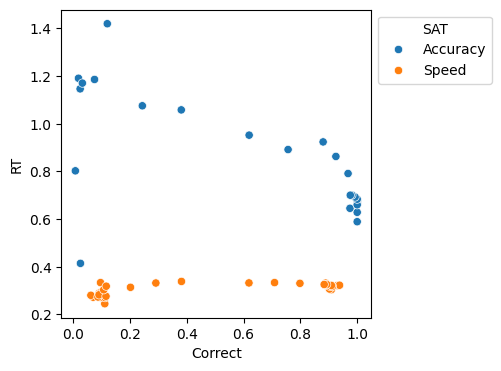

In [364]:
fig, ax = plt.subplots(1, figsize = (4,4))
ax = sns.scatterplot(data=data_plot, x="Correct", y="RT", hue="SAT", markers="True")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [204]:
class DriftConstantBrightness(Drift):
    name = "DriftConstantSpeedAcc"
    required_parameters = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16',
 'V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33']
    required_conditions = ['Brightness']
        
    def get_drift(self, x, t, conditions, **kwargs):
        #print(conditions['Brightness'])
        if conditions['Brightness'] == 1:
            return self.V1
        elif conditions['Brightness'] == 2:
            return self.V2
        elif conditions['Brightness'] == 3:
            return self.V3
        elif conditions['Brightness'] == 4:
            return self.V4
        elif conditions['Brightness'] == 5:
            return self.V5
        elif conditions['Brightness'] == 6:
            return self.V6
        elif conditions['Brightness'] == 7:
            return self.V7
        elif conditions['Brightness'] == 8:
            return self.V8
        elif conditions['Brightness'] == 9:
            return self.V9
        elif conditions['Brightness'] == 10:
            return self.V10
        elif conditions['Brightness'] == 11:
            return self.V11
        elif conditions['Brightness'] == 12:
            return self.V12
        elif conditions['Brightness'] == 13:
            return self.V13
        elif conditions['Brightness'] == 14:
            return self.V14
        elif conditions['Brightness'] == 15:
            return self.V15
        elif conditions['Brightness'] == 16:
            return self.V16
        elif conditions['Brightness'] == 17:
            return self.V17
        elif conditions['Brightness'] == 18:
            return self.V18
        elif conditions['Brightness'] == 19:
            return self.V19
        elif conditions['Brightness'] == 20:
            return self.V20
        elif conditions['Brightness'] == 21:
            return self.V21
        elif conditions['Brightness'] == 22:
            return self.V22
        elif conditions['Brightness'] == 23:
            return self.V23
        elif conditions['Brightness'] == 24:
            return self.V24
        elif conditions['Brightness'] == 25:
            return self.V25
        elif conditions['Brightness'] == 26:
            return self.V26
        elif conditions['Brightness'] == 27:
            return self.V27
        elif conditions['Brightness'] == 28:
            return self.V28
        elif conditions['Brightness'] == 29:
            return self.V29
        elif conditions['Brightness'] == 30:
            return self.V30
        elif conditions['Brightness'] == 31:
            return self.V31
        elif conditions['Brightness'] == 32:
            return self.V32
        elif conditions['Brightness'] == 33:
            return self.V33
        else:
            print("Non-implemented SAT conditions")

class BoundSpeedAcc(Bound):
    name = "BoundSpeedAcc"
    required_parameters = ["Bspeed", "Bacc"]
    required_conditions = ['SAT']
    def get_bound(self, conditions, *args, **kwargs):
        assert self.Bacc > 0
        assert self.Bspeed > 0
        if conditions['SAT'] == 'Speed':
            return self.Bspeed
        elif conditions['SAT'] == 'Accuracy':
            return self.Bacc
        else:
            print("Non-implemented SAT conditions")
            
class DriftExcitationSpeedAcc(Drift):
    name = "DriftSpeedAcc"
    required_parameters = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16',
 'V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33', "Kspeed", "Kacc"]
    required_conditions = ['Brightness', "SAT"]
        
    def get_drift(self, x, t, conditions, **kwargs):
        #print(conditions['Brightness'])
        if conditions['SAT'] == "Speed":
            if conditions['Brightness'] == 1:
                return self.V1 + x*self.Kspeed 
            elif conditions['Brightness'] == 2:
                return self.V2 + x*self.Kspeed 
            elif conditions['Brightness'] == 3:
                return self.V3 + x*self.Kspeed 
            elif conditions['Brightness'] == 4:
                return self.V4 + x*self.Kspeed 
            elif conditions['Brightness'] == 5:
                return self.V5 + x*self.Kspeed 
            elif conditions['Brightness'] == 6:
                return self.V6 + x*self.Kspeed 
            elif conditions['Brightness'] == 7:
                return self.V7 + x*self.Kspeed 
            elif conditions['Brightness'] == 8:
                return self.V8 + x*self.Kspeed 
            elif conditions['Brightness'] == 9:
                return self.V9 + x*self.Kspeed 
            elif conditions['Brightness'] == 10:
                return self.V10 + x*self.Kspeed 
            elif conditions['Brightness'] == 11:
                return self.V11 + x*self.Kspeed 
            elif conditions['Brightness'] == 12:
                return self.V12 + x*self.Kspeed 
            elif conditions['Brightness'] == 13:
                return self.V13 + x*self.Kspeed 
            elif conditions['Brightness'] == 14:
                return self.V14 + x*self.Kspeed 
            elif conditions['Brightness'] == 15:
                return self.V15 + x*self.Kspeed 
            elif conditions['Brightness'] == 16:
                return self.V16 + x*self.Kspeed 
            elif conditions['Brightness'] == 17:
                return self.V17 + x*self.Kspeed 
            elif conditions['Brightness'] == 18:
                return self.V18 + x*self.Kspeed 
            elif conditions['Brightness'] == 19:
                return self.V19 + x*self.Kspeed 
            elif conditions['Brightness'] == 20:
                return self.V20 + x*self.Kspeed 
            elif conditions['Brightness'] == 21:
                return self.V21 + x*self.Kspeed 
            elif conditions['Brightness'] == 22:
                return self.V22 + x*self.Kspeed 
            elif conditions['Brightness'] == 23:
                return self.V23 + x*self.Kspeed 
            elif conditions['Brightness'] == 24:
                return self.V24 + x*self.Kspeed 
            elif conditions['Brightness'] == 25:
                return self.V25 + x*self.Kspeed 
            elif conditions['Brightness'] == 26:
                return self.V26 + x*self.Kspeed 
            elif conditions['Brightness'] == 27:
                return self.V27 + x*self.Kspeed 
            elif conditions['Brightness'] == 28:
                return self.V28 + x*self.Kspeed 
            elif conditions['Brightness'] == 29:
                return self.V29 + x*self.Kspeed 
            elif conditions['Brightness'] == 30:
                return self.V30 + x*self.Kspeed 
            elif conditions['Brightness'] == 31:
                return self.V31 + x*self.Kspeed 
            elif conditions['Brightness'] == 32:
                return self.V32 + x*self.Kspeed 
            elif conditions['Brightness'] == 33:
                return self.V33 + x*self.Kspeed 
            else:
                print("Non-implemented SAT conditions")  

        if conditions['SAT'] == "Accuracy":
            if conditions['Brightness'] == 1:
                return self.V1 + x*self.Kacc
            elif conditions['Brightness'] == 2:
                return self.V2 + x*self.Kacc
            elif conditions['Brightness'] == 3:
                return self.V3 + x*self.Kacc
            elif conditions['Brightness'] == 4:
                return self.V4 + x*self.Kacc
            elif conditions['Brightness'] == 5:
                return self.V5 + x*self.Kacc
            elif conditions['Brightness'] == 6:
                return self.V6 + x*self.Kacc
            elif conditions['Brightness'] == 7:
                return self.V7 + x*self.Kacc
            elif conditions['Brightness'] == 8:
                return self.V8 + x*self.Kacc
            elif conditions['Brightness'] == 9:
                return self.V9 + x*self.Kacc
            elif conditions['Brightness'] == 10:
                return self.V10 + x*self.Kacc
            elif conditions['Brightness'] == 11:
                return self.V11 + x*self.Kacc
            elif conditions['Brightness'] == 12:
                return self.V12 + x*self.Kacc
            elif conditions['Brightness'] == 13:
                return self.V13 + x*self.Kacc
            elif conditions['Brightness'] == 14:
                return self.V14 + x*self.Kacc
            elif conditions['Brightness'] == 15:
                return self.V15 + x*self.Kacc
            elif conditions['Brightness'] == 16:
                return self.V16 + x*self.Kacc
            elif conditions['Brightness'] == 17:
                return self.V17 + x*self.Kacc
            elif conditions['Brightness'] == 18:
                return self.V18 + x*self.Kacc
            elif conditions['Brightness'] == 19:
                return self.V19 + x*self.Kacc
            elif conditions['Brightness'] == 20:
                return self.V20 + x*self.Kacc
            elif conditions['Brightness'] == 21:
                return self.V21 + x*self.Kacc
            elif conditions['Brightness'] == 22:
                return self.V22 + x*self.Kacc
            elif conditions['Brightness'] == 23:
                return self.V23 + x*self.Kacc
            elif conditions['Brightness'] == 24:
                return self.V24 + x*self.Kacc
            elif conditions['Brightness'] == 25:
                return self.V25 + x*self.Kacc
            elif conditions['Brightness'] == 26:
                return self.V26 + x*self.Kacc
            elif conditions['Brightness'] == 27:
                return self.V27 + x*self.Kacc
            elif conditions['Brightness'] == 28:
                return self.V28 + x*self.Kacc
            elif conditions['Brightness'] == 29:
                return self.V29 + x*self.Kacc
            elif conditions['Brightness'] == 30:
                return self.V30 + x*self.Kacc
            elif conditions['Brightness'] == 31:
                return self.V31 + x*self.Kacc
            elif conditions['Brightness'] == 32:
                return self.V32 + x*self.Kacc
            elif conditions['Brightness'] == 33:
                return self.V33 + x*self.Kacc
            else:
                print("Non-implemented SAT conditions")  

In [ ]:
                      drift=DriftExcitationSpeedAcc(drift=Fittable(minval=v[0], maxval=v[1]),
                                                    Kspeed=Fittable(minval=k[0], maxval=k[1]),
                                                    Kacc=Fittable(minval=k[0], maxval=k[1])),     

In [218]:
def get_OUM_result_sub_33v1a2k2ter(samp, v = [0,6], a = [0.5,4], k=[-20,20], ter=[0.1,1], T_dur=5):
    
    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftExcitationSpeedAcc(V1 = Fittable(minval=v[0], maxval=v[1]),
                                                    V2 = Fittable(minval=v[0], maxval=v[1]),
                                                    V3 = Fittable(minval=v[0], maxval=v[1]),
                                                    V4 = Fittable(minval=v[0], maxval=v[1]),
                                                    V5 = Fittable(minval=v[0], maxval=v[1]),
                                                    V6 = Fittable(minval=v[0], maxval=v[1]),
                                                    V7 = Fittable(minval=v[0], maxval=v[1]),
                                                    V8 = Fittable(minval=v[0], maxval=v[1]),
                                                    V9 = Fittable(minval=v[0], maxval=v[1]),
                                                    V10 = Fittable(minval=v[0], maxval=v[1]),
                                                    V11 = Fittable(minval=v[0], maxval=v[1]),
                                                    V12 = Fittable(minval=v[0], maxval=v[1]),
                                                    V13 = Fittable(minval=v[0], maxval=v[1]),
                                                    V14 = Fittable(minval=v[0], maxval=v[1]),
                                                    V15 = Fittable(minval=v[0], maxval=v[1]),
                                                    V16 = Fittable(minval=v[0], maxval=v[1]),
                                                    V17 = Fittable(minval=v[0], maxval=v[1]),
                                                    V18 = Fittable(minval=v[0], maxval=v[1]),
                                                    V19 = Fittable(minval=v[0], maxval=v[1]),
                                                    V20 = Fittable(minval=v[0], maxval=v[1]),
                                                    V21 = Fittable(minval=v[0], maxval=v[1]),
                                                    V22 = Fittable(minval=v[0], maxval=v[1]),
                                                    V23 = Fittable(minval=v[0], maxval=v[1]),
                                                    V24 = Fittable(minval=v[0], maxval=v[1]),
                                                    V25 = Fittable(minval=v[0], maxval=v[1]),
                                                    V26 = Fittable(minval=v[0], maxval=v[1]),
                                                    V27 = Fittable(minval=v[0], maxval=v[1]),
                                                    V28 = Fittable(minval=v[0], maxval=v[1]),
                                                    V29 = Fittable(minval=v[0], maxval=v[1]),
                                                    V30 = Fittable(minval=v[0], maxval=v[1]),
                                                    V31 = Fittable(minval=v[0], maxval=v[1]),
                                                    V32 = Fittable(minval=v[0], maxval=v[1]),
                                                    V33 = Fittable(minval=v[0], maxval=v[1]),
                                                    Kspeed=Fittable(minval=k[0], maxval=k[1]),
                                                    Kacc=Fittable(minval=k[0], maxval=k[1])), 
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=a[0], maxval=a[1])),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=ter[0], maxval=ter[1])),
                      dx=.01, dt=.01, T_dur=T_dur)
    #set_N_cpus(4)
    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    #print(model_fit.get_model_parameters())
    df = pd.DataFrame(data = np.array(model_fit.get_model_parameters()).reshape(1,37),
                      columns = model_fit.get_model_parameter_names())
    
    #df['Participant']=i+1
    #df['SAT'] = SAT
    df['BIC'] = model_fit.get_fit_result().value()
    df = df.rename(columns={'V1': 'Drift Rate 1',
                            'V2': 'Drift Rate 2',
                            'V3': 'Drift Rate 3',
                            'V4': 'Drift Rate 4',
                            'V5': 'Drift Rate 5',
                            'V6': 'Drift Rate 6',
                            'V7': 'Drift Rate 7',
                            'V8': 'Drift Rate 8',
                            'V9': 'Drift Rate 9',
                            'V10': 'Drift Rate 10',
                            'V11': 'Drift Rate 11',
                            'V12': 'Drift Rate 12',
                            'V13': 'Drift Rate 13',
                            'V14': 'Drift Rate 14',
                            'V15': 'Drift Rate 15',
                            'V16': 'Drift Rate 16',
                            'V17': 'Drift Rate 17',
                            'V18': 'Drift Rate 18',
                            'V19': 'Drift Rate 19',
                            'V20': 'Drift Rate 20',
                            'V21': 'Drift Rate 21',
                            'V22': 'Drift Rate 22',
                            'V23': 'Drift Rate 23',
                            'V24': 'Drift Rate 24',
                            'V25': 'Drift Rate 25',
                            'V26': 'Drift Rate 26',
                            'V27': 'Drift Rate 27',
                            'V28': 'Drift Rate 28',
                            'V29': 'Drift Rate 29',
                            'V30': 'Drift Rate 30',
                            'V31': 'Drift Rate 31',
                            'V32': 'Drift Rate 32',
                            'V33': 'Drift Rate 33',
                            'B': 'Boundary Separation',
                            'Kspeed': 'Self-excitation Speed',
                            'Kacc': 'Self-excitation Accuracy',
                            'nondectime': 'Non-decision Time'})
    return df,model_fit

In [145]:
def get_DDM_result_sub_33v2a2ter(samp, v = [0,6], a = [0.5,8], ter=[0.1,1], T_dur=5):
    
    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftConstantBrightness(V1 = Fittable(minval=v[0], maxval=v[1]),
                                                    V2 = Fittable(minval=v[0], maxval=v[1]),
                                                    V3 = Fittable(minval=v[0], maxval=v[1]),
                                                    V4 = Fittable(minval=v[0], maxval=v[1]),
                                                    V5 = Fittable(minval=v[0], maxval=v[1]),
                                                    V6 = Fittable(minval=v[0], maxval=v[1]),
                                                    V7 = Fittable(minval=v[0], maxval=v[1]),
                                                    V8 = Fittable(minval=v[0], maxval=v[1]),
                                                    V9 = Fittable(minval=v[0], maxval=v[1]),
                                                    V10 = Fittable(minval=v[0], maxval=v[1]),
                                                    V11 = Fittable(minval=v[0], maxval=v[1]),
                                                    V12 = Fittable(minval=v[0], maxval=v[1]),
                                                    V13 = Fittable(minval=v[0], maxval=v[1]),
                                                    V14 = Fittable(minval=v[0], maxval=v[1]),
                                                    V15 = Fittable(minval=v[0], maxval=v[1]),
                                                    V16 = Fittable(minval=v[0], maxval=v[1]),
                                                    V17 = Fittable(minval=v[0], maxval=v[1]),
                                                    V18 = Fittable(minval=v[0], maxval=v[1]),
                                                    V19 = Fittable(minval=v[0], maxval=v[1]),
                                                    V20 = Fittable(minval=v[0], maxval=v[1]),
                                                    V21 = Fittable(minval=v[0], maxval=v[1]),
                                                    V22 = Fittable(minval=v[0], maxval=v[1]),
                                                    V23 = Fittable(minval=v[0], maxval=v[1]),
                                                    V24 = Fittable(minval=v[0], maxval=v[1]),
                                                    V25 = Fittable(minval=v[0], maxval=v[1]),
                                                    V26 = Fittable(minval=v[0], maxval=v[1]),
                                                    V27 = Fittable(minval=v[0], maxval=v[1]),
                                                    V28 = Fittable(minval=v[0], maxval=v[1]),
                                                    V29 = Fittable(minval=v[0], maxval=v[1]),
                                                    V30 = Fittable(minval=v[0], maxval=v[1]),
                                                    V31 = Fittable(minval=v[0], maxval=v[1]),
                                                    V32 = Fittable(minval=v[0], maxval=v[1]),
                                                    V33 = Fittable(minval=v[0], maxval=v[1])), 
                      noise=NoiseConstant(noise=1),
                      bound=BoundSpeedAcc(
                          Bspeed=Fittable(minval=a[0], maxval=a[1]),
                          Bacc=Fittable(minval=a[0], maxval=a[1])),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=ter[0], maxval=ter[1])),
                      dx=.01, dt=.01, T_dur=T_dur)
    #set_N_cpus(4)
    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    #print(model_fit.get_model_parameters())
    df = pd.DataFrame(data = np.array(model_fit.get_model_parameters()).reshape(1,36),
                      columns = model_fit.get_model_parameter_names())
    
    #df['Participant']=i+1
    #df['SAT'] = SAT
    df['BIC'] = model_fit.get_fit_result().value()
    df = df.rename(columns={'V1': 'Drift Rate 1',
                            'V2': 'Drift Rate 2',
                            'V3': 'Drift Rate 3',
                            'V4': 'Drift Rate 4',
                            'V5': 'Drift Rate 5',
                            'V6': 'Drift Rate 6',
                            'V7': 'Drift Rate 7',
                            'V8': 'Drift Rate 8',
                            'V9': 'Drift Rate 9',
                            'V10': 'Drift Rate 10',
                            'V11': 'Drift Rate 11',
                            'V12': 'Drift Rate 12',
                            'V13': 'Drift Rate 13',
                            'V14': 'Drift Rate 14',
                            'V15': 'Drift Rate 15',
                            'V16': 'Drift Rate 16',
                            'V17': 'Drift Rate 17',
                            'V18': 'Drift Rate 18',
                            'V19': 'Drift Rate 19',
                            'V20': 'Drift Rate 20',
                            'V21': 'Drift Rate 21',
                            'V22': 'Drift Rate 22',
                            'V23': 'Drift Rate 23',
                            'V24': 'Drift Rate 24',
                            'V25': 'Drift Rate 25',
                            'V26': 'Drift Rate 26',
                            'V27': 'Drift Rate 27',
                            'V28': 'Drift Rate 28',
                            'V29': 'Drift Rate 29',
                            'V30': 'Drift Rate 30',
                            'V31': 'Drift Rate 31',
                            'V32': 'Drift Rate 32',
                            'V33': 'Drift Rate 33',
                            'Bspeed': 'Boundary Separation Speed',
                            'Bacc': 'Boundary Separation Accuracy',
                            'nondectime': 'Non-decision Time'})
    return df,model_fit

In [114]:
df

,Nothing,Condition,Choice,RT,SAT,Brightness,Correct
0,1,1,0,0.995,Accuracy,1.0,True
1,1,1,0,1.265,Accuracy,1.0,True
2,1,1,0,0.712,Accuracy,1.0,True
3,1,1,0,0.623,Accuracy,1.0,True
4,1,1,0,0.456,Accuracy,1.0,True
...,...,...,...,...,...,...,...
7884,1,66,0,0.193,Speed,33.0,False
7885,1,66,1,0.249,Speed,33.0,True
7886,1,66,1,0.361,Speed,33.0,True
7887,1,66,1,0.338,Speed,33.0,True


In [146]:


df = df[df["RT"]<5]

samp = Sample.from_pandas_dataframe(df, rt_column_name="RT", choice_column_name="Correct")
df_result, model_fit = get_DDM_result_sub_33v2a2ter(samp)
print(df_result)



Info: Params [2.20749183 2.49472994 2.43081738 2.89836023 2.59401321 2.42667875
 2.31005464 2.33995404 2.37145689 2.27939029 2.19248743 1.82806759
 1.54740484 1.07995293 0.56196071 0.         0.40671358 0.77893815
 1.13258323 1.32065008 1.60023286 1.81934855 2.00625141 2.0534562
 2.06306145 2.22493292 2.37169646 2.14525237 2.1164168  2.43675825
 2.24606961 2.38041015 2.43948445 0.5        1.12902559 0.1651424 ] gave -99.07452007768694


   Drift Rate 1  Drift Rate 2  Drift Rate 3  Drift Rate 4  Drift Rate 5  \
0      2.207492       2.49473      2.430817       2.89836      2.594013   

   Drift Rate 6  Drift Rate 7  Drift Rate 8  Drift Rate 9  Drift Rate 10  ...  \
0      2.426679      2.310055      2.339954      2.371457        2.27939  ...   

   Drift Rate 28  Drift Rate 29  Drift Rate 30  Drift Rate 31  Drift Rate 32  \
0       2.145252       2.116417       2.436758        2.24607        2.38041   

   Drift Rate 33  Boundary Separation Speed  Boundary Separation Accuracy  \
0       2.439484                        0.5                      1.129026   

   Non-decision Time       BIC  
0           0.165142 -99.07452  

[1 rows x 37 columns]


Text(0.5, 1.0, 'JF')

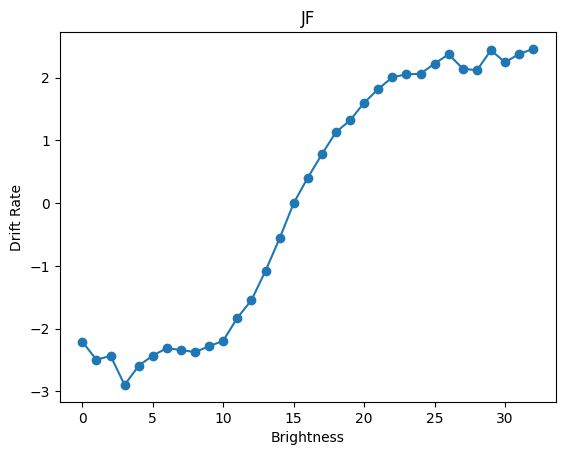

In [139]:
x = np.array(df)[0]
x[0:15] = -x[0:15].copy()

plt.plot(x[0:33], "-o")
plt.xlabel("Brightness")
plt.ylabel("Drift Rate")
plt.title("JF")


In [158]:
model_prediction =pd.DataFrame()
for i in range(1,34):
    for j in ["Speed", "Accuracy"]:
        samp = model_fit.solve({'SAT':j, 'Brightness':i}).resample(1000).to_pandas_dataframe(drop_undecided = True)
        model_prediction = pd.concat((model_prediction,samp))


In [169]:

model_prediction = model_prediction.rename(columns = {"choice":"Correct"})
model_prediction.loc[model_prediction["Brightness"] <= 15, "Choice"] = model_prediction.loc[model_prediction["Brightness"] <= 15, "Correct"]==0
model_prediction.loc[model_prediction["Brightness"] > 15, "Choice"] = model_prediction.loc[model_prediction["Brightness"] > 15, "Correct"]==1


,Correct,RT,SAT,Brightness
0,1,0.246487,Speed,1
1,1,0.476394,Speed,1
2,1,0.475299,Speed,1
3,1,0.563900,Speed,1
4,1,0.525220,Speed,1
...,...,...,...,...
995,1,0.541566,Accuracy,33
996,1,0.759837,Accuracy,33
997,1,0.498343,Accuracy,33
998,1,0.598305,Accuracy,33


In [381]:
# to plot latency function
model_prediction.loc[model_prediction["Brightness"] < 17, "Difficulty"] = model_prediction.loc[model_prediction["Brightness"] < 17, "Brightness"]
model_prediction.loc[model_prediction["Brightness"] > 17, "Difficulty"] = 33-model_prediction.loc[model_prediction["Brightness"] > 17, "Brightness"]+1

prediction_plot = model_prediction.groupby(["SAT", "Difficulty", "Correct"]).agg({"Correct":'count'})
prediction_plot2 = model_prediction.groupby(["SAT", "Difficulty"]).agg({"Correct":'count'})

prediction_plot3 = model_prediction.groupby(["SAT", "Difficulty", "Correct"]).agg({'RT':'mean'})

prediction_plot = pd.concat((prediction_plot/prediction_plot2,prediction_plot3), axis = 1)

In [382]:
fig, ax = plt.subplots(1, figsize = (4,4))
ax = sns.scatterplot(data=data_plot, x="Correct", y="RT", hue="SAT", markers="True")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))prediction_plot

Correct        RT
SAT      Difficulty Correct                   
Accuracy 1.0        0         0.0085  0.774922
                    1         0.9915  0.606353
         2.0        0         0.0045  0.598072
                    1         0.9955  0.615999
         3.0        0         0.0110  0.681287
...                              ...       ...
Speed    14.0       1         0.6985  0.365537
         15.0       0         0.3605  0.410500
                    1         0.6395  0.373046
         16.0       0         0.4480  0.396697
                    1         0.5520  0.383762

[64 rows x 2 columns]

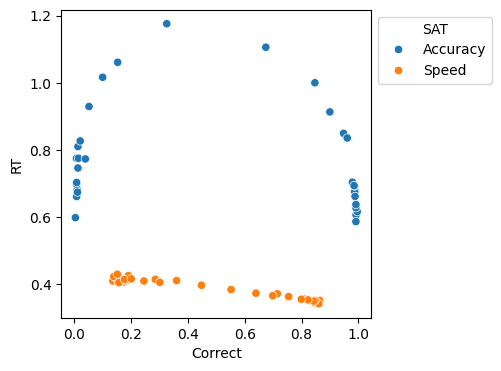

In [385]:
## DDM prediction

fig, ax = plt.subplots(1, figsize = (4,4))
ax = sns.scatterplot(data=prediction_plot, x="Correct", y="RT", hue="SAT", markers = "$\cros$")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [243]:


df = df[df["RT"]<5]

samp = Sample.from_pandas_dataframe(df, rt_column_name="RT", choice_column_name="Correct")
OUM_result, model_fit_OUM = get_OUM_result_sub_33v1a2k2ter(samp)
print(OUM_result)



Info: Params [ 2.09933874  2.90575732  2.43932718  3.16698879  2.76370027  2.70659694
  2.03761399  2.17738417  1.78390947  2.15083576  2.25314577  1.1810762
  1.33593993  1.21695429  0.72465069  0.13111905  0.44706962  0.75935757
  1.18766576  1.35122078  1.70425634  1.61097759  2.0180442   2.17097814
  1.85556966  2.16686024  2.05535147  1.98835225  2.05979231  2.84355958
  2.65346891  2.33935105  3.28173971 15.79562902  1.81093507  1.6445186
  0.15402018] gave -2607.1637996280256


   Drift Rate 1  Drift Rate 2  Drift Rate 3  Drift Rate 4  Drift Rate 5  \
0      2.099339      2.905757      2.439327      3.166989        2.7637   

   Drift Rate 6  Drift Rate 7  Drift Rate 8  Drift Rate 9  Drift Rate 10  ...  \
0      2.706597      2.037614      2.177384      1.783909       2.150836  ...   

   Drift Rate 29  Drift Rate 30  Drift Rate 31  Drift Rate 32  Drift Rate 33  \
0       2.059792        2.84356       2.653469       2.339351        3.28174   

   Self-excitation Speed  Self-excitation Accuracy  Boundary Separation  \
0              15.795629                  1.810935             1.644519   

   Non-decision Time        BIC  
0            0.15402 -2607.1638  

[1 rows x 38 columns]


Text(0.5, 1.0, 'JF')

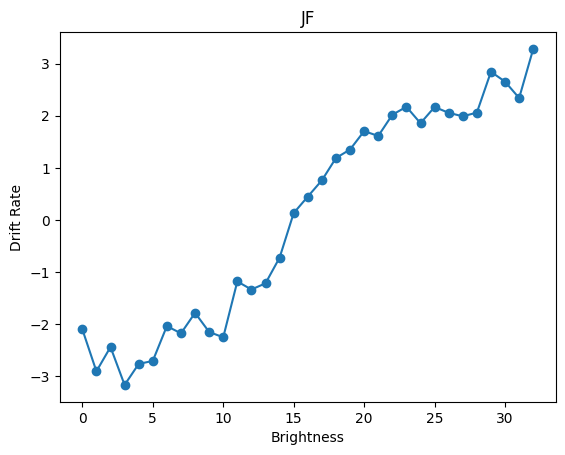

In [244]:
x = np.array(OUM_result)[0]
x[0:15] = -x[0:15].copy()

plt.plot(x[0:33], "-o")
plt.xlabel("Brightness")
plt.ylabel("Drift Rate")
plt.title("JF")


In [245]:
OUM_prediction =pd.DataFrame()
for i in range(1,34):
    for j in ["Speed", "Accuracy"]:
        samp = model_fit_OUM.solve({'SAT':j, 'Brightness':i}).resample(1000).to_pandas_dataframe(drop_undecided = True)
        OUM_prediction = pd.concat((OUM_prediction,samp))

        
OUM_prediction = OUM_prediction.rename(columns = {"choice":"Correct"})
OUM_prediction.loc[OUM_prediction["Brightness"] <= 15, "Choice"] = OUM_prediction.loc[OUM_prediction["Brightness"] <= 15, "Correct"]==0
OUM_prediction.loc[OUM_prediction["Brightness"] > 15, "Choice"] = OUM_prediction.loc[OUM_prediction["Brightness"] > 15, "Correct"]==1


In [254]:
OUM_prediction

,Correct,RT,SAT,Brightness,Choice
0,1,0.594497,Speed,1,False
1,1,0.363347,Speed,1,False
2,1,0.374526,Speed,1,False
3,1,0.378892,Speed,1,False
4,1,0.373111,Speed,1,False
...,...,...,...,...,...
995,1,0.502211,Accuracy,33,True
996,1,0.831343,Accuracy,33,True
997,1,0.624643,Accuracy,33,True
998,1,0.582089,Accuracy,33,True


In [388]:
# to plot latency function
OUM_prediction.loc[OUM_prediction["Brightness"] < 17, "Difficulty"] = OUM_prediction.loc[OUM_prediction["Brightness"] < 17, "Brightness"]
OUM_prediction.loc[OUM_prediction["Brightness"] > 17, "Difficulty"] = 33-OUM_prediction.loc[OUM_prediction["Brightness"] > 17, "Brightness"]+1

OUM_prediction_plot = OUM_prediction.groupby(["SAT", "Difficulty", "Correct"]).agg({"Correct":'count'})
OUM_prediction_plot2 = OUM_prediction.groupby(["SAT", "Difficulty"]).agg({"Correct":'count'})

OUM_prediction_plot3 = OUM_prediction.groupby(["SAT", "Difficulty", "Correct"]).agg({'RT':'mean'})

OUM_prediction_plot = pd.concat((OUM_prediction_plot/OUM_prediction_plot2,OUM_prediction_plot3), axis = 1)

In [389]:
OUM_prediction_plot 

Correct        RT
SAT      Difficulty Correct                    
Accuracy 1.0        0        0.009005  1.015358
                    1        0.990995  0.614370
         2.0        0        0.003500  0.873736
                    1        0.996500  0.627522
         3.0        0        0.003500  0.687218
...                               ...       ...
Speed    14.0       1        0.668000  0.331811
         15.0       0        0.355500  0.351225
                    1        0.644500  0.334720
         16.0       0        0.428000  0.352401
                    1        0.572000  0.341506

[64 rows x 2 columns]

In [392]:
data_all = pd.concat((data_plot,prediction_plot, OUM_prediction_plot))
data_all["Type"] = ["Data"]*57 + ["DDM"]*64 + ["OUM"]*64

/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_72047/2682232630.py:1: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  data_all = pd.concat((data_plot,prediction_plot, OUM_prediction_plot))


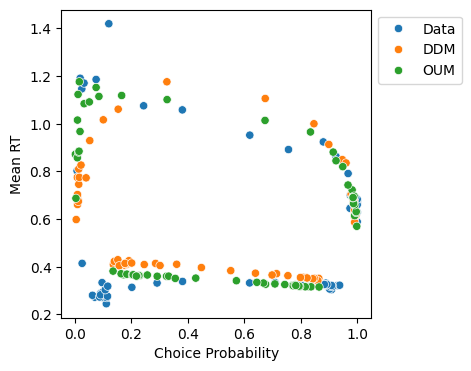

In [394]:
## OUM prediction

fig, ax = plt.subplots(1, figsize = (4,4))
ax = sns.scatterplot(data=data_all, x="Correct", y="RT", hue="Type")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Choice Probability")
plt.ylabel("Mean RT")
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1))


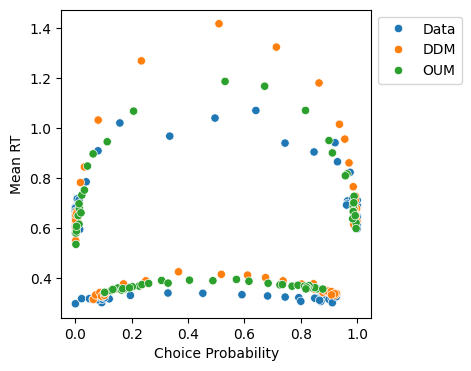

In [242]:
## OUM prediction

fig, ax = plt.subplots(1, figsize = (4,4))
ax = sns.scatterplot(data=data_all, x="Choice", y="RT", hue="Type")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Choice Probability")
plt.ylabel("Mean RT")
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1))


In [268]:

data_plot_cor = df.groupby(["SAT", "Brightness"]).agg({'RT':'mean', "Correct":'mean'})


In [269]:
# DDM
prediction_plot_cor = model_prediction.groupby(["SAT", "Brightness"]).agg({'RT':'mean', "Correct":'mean'})

In [270]:
OUM_prediction_plot_cor = model_prediction.groupby(["SAT", "Brightness"]).agg({'RT':'mean', "Correct":'mean'})
OUM_prediction_plot_cor

data_all_cor = pd.concat((data_plot_cor,prediction_plot_cor, OUM_prediction_plot_cor))
data_all_cor["Type"] = ["Data"]*66 + ["DDM"]*66 + ["OUM"]*66

In [271]:
data_all_cor

RT   Correct  Type
SAT      Brightness                          
Accuracy 1.0         0.684182  1.000000  Data
         2.0         0.606654  1.000000  Data
         3.0         0.646571  1.000000  Data
         4.0         0.580894  1.000000  Data
         5.0         0.595815  0.984615  Data
...                       ...       ...   ...
Speed    29.0        0.371006  0.829000   OUM
         30.0        0.361677  0.825000   OUM
         31.0        0.365226  0.820000   OUM
         32.0        0.357845  0.818000   OUM
         33.0        0.357112  0.878000   OUM

[198 rows x 3 columns]

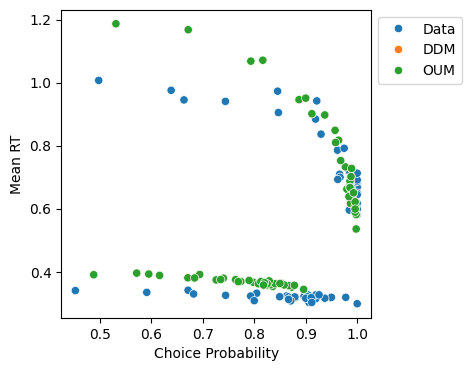

In [272]:
## OUM prediction

fig, ax = plt.subplots(1, figsize = (4,4))
ax = sns.scatterplot(data=data_all_cor, x="Correct", y="RT", hue="Type")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Choice Probability")
plt.ylabel("Mean RT")
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1))
